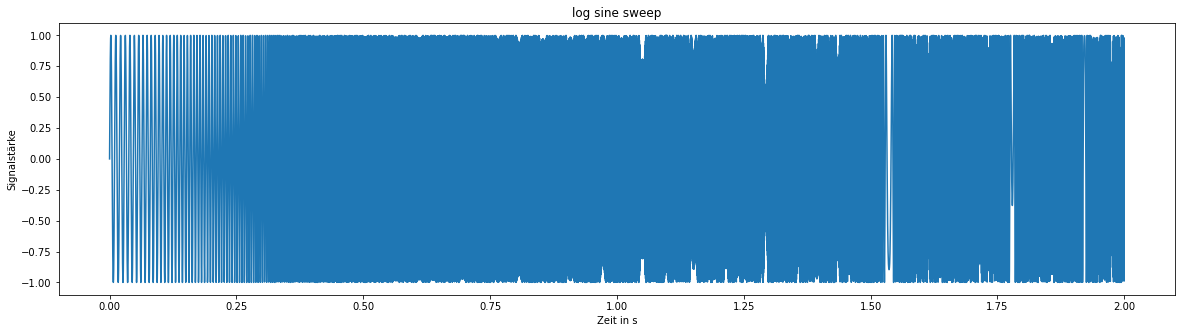

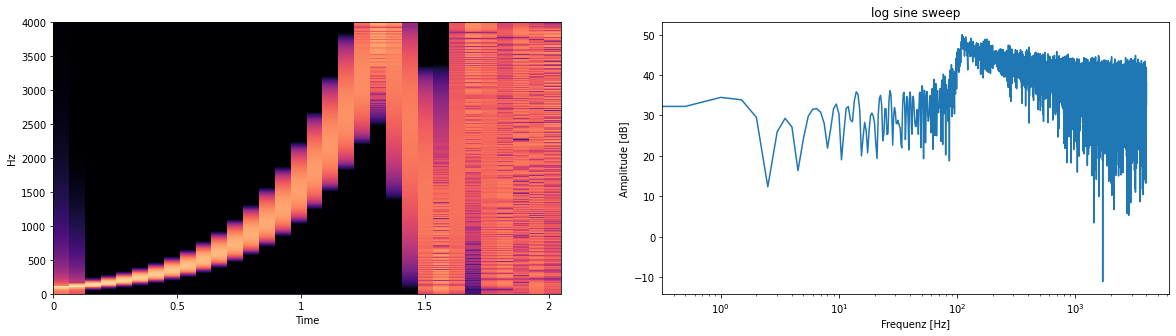

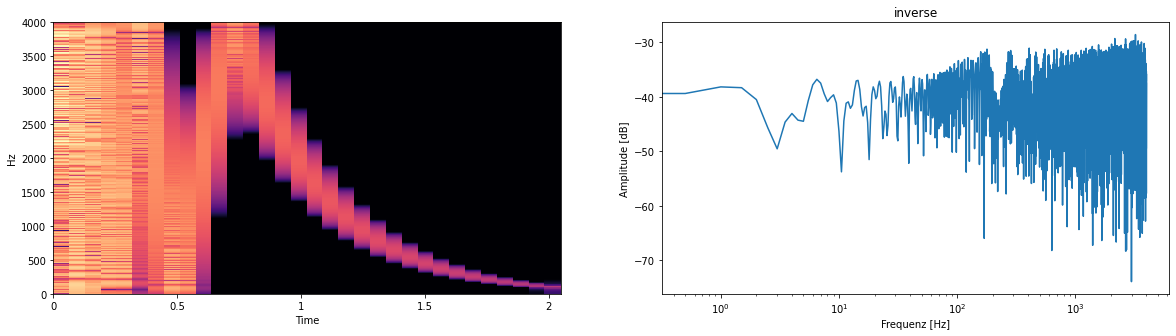

In [55]:
from signal_generator import signal_generator,audio_interface 
sg=signal_generator(sr=8000)
#linsweep=sg.linsweep(w1=10,w2=500,T=10)
logsweep=sg.logsweep(w1=100,w2=30000,T=2)


#sine=sg.sine(w=1000, T=10)

#linsweep.plot_signal()
#linsweep.plot_spec()
#linsweep.plot_spectrum()
#linsweep.plot_spectrogram()

logsweep.plot_signal()
logsweep.plot_spec()
sg.plot_spec(logsweep.inverse(),title="inverse")
#logsweep.plot_spectrum()
#logsweep.plot_spectrogram()
#sine.plot_spec()

In [56]:
rec=audio_interface().playrecord(signal=logsweep.signal)

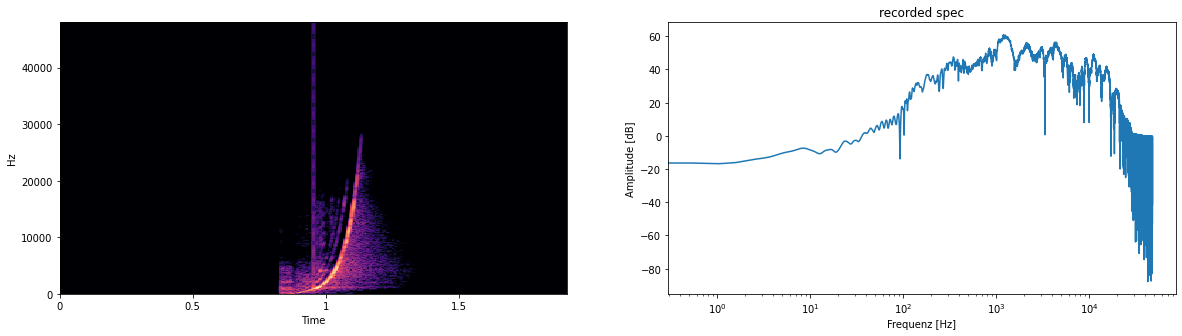

In [11]:
sg.plot_spec(rec,title="recorded spec")

In [12]:
import scipy.fftpack
import scipy.signal
from scipy.fftpack import fft, ifft
from scipy.signal import fftconvolve, convolve, kaiser
import numpy as np
import math

In [50]:
logsweep=sg.logsweep(w1=4998,w2=4999,T=1)
rec=audio_interface().playrecord(signal=logsweep.signal)

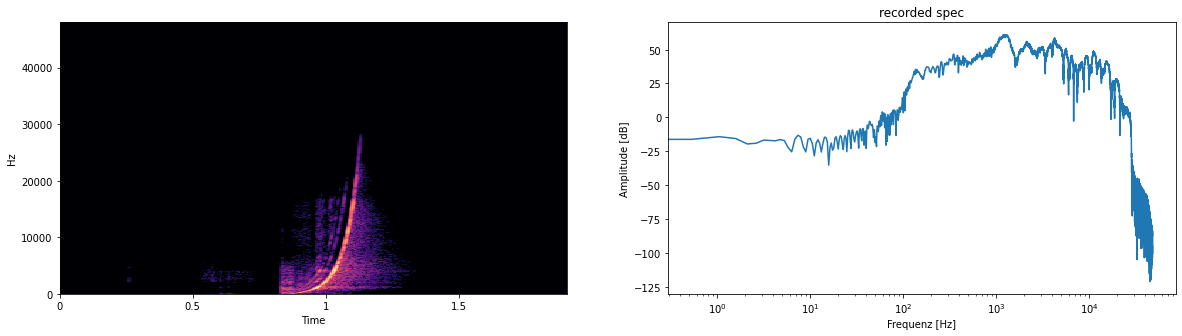

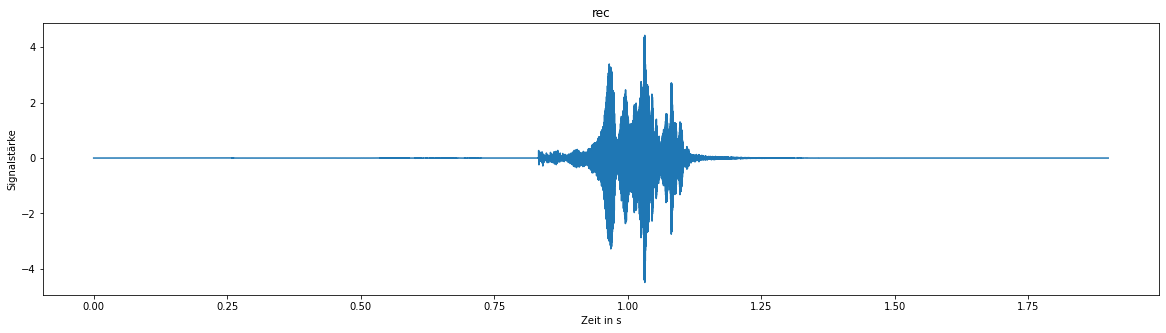

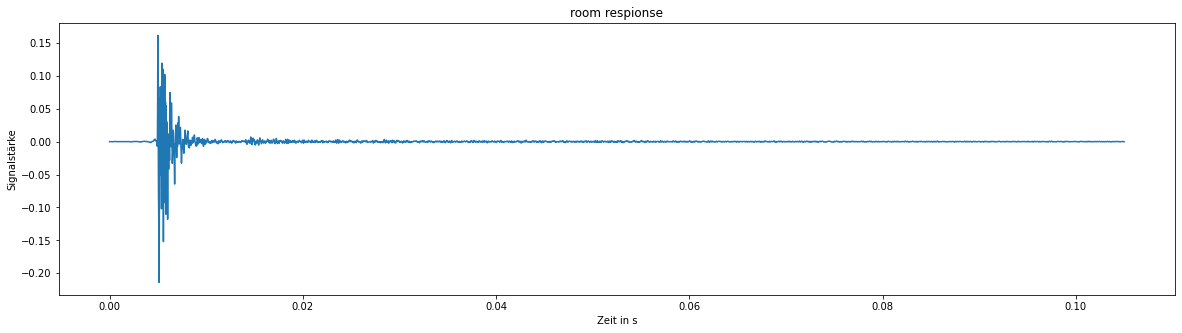

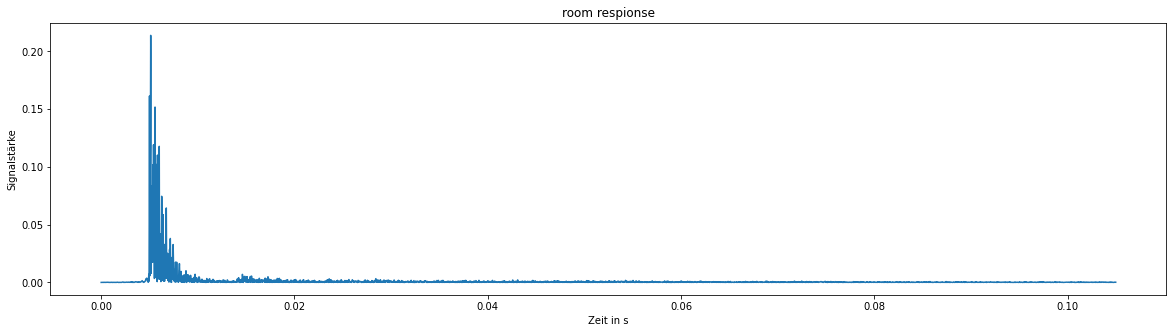

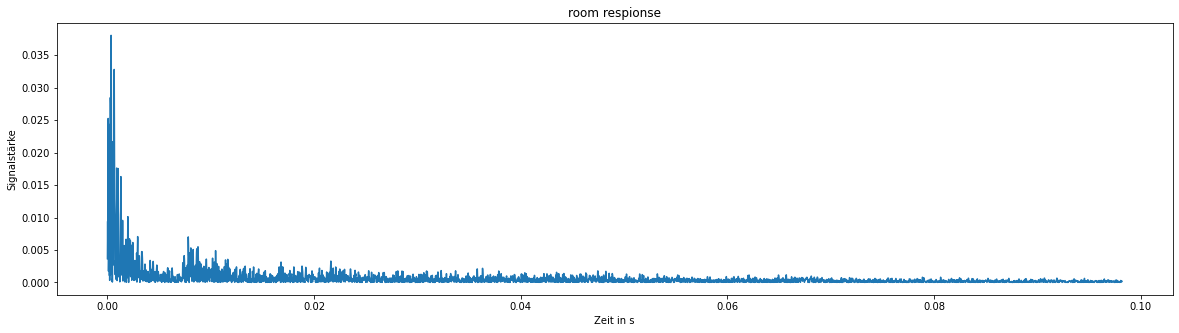

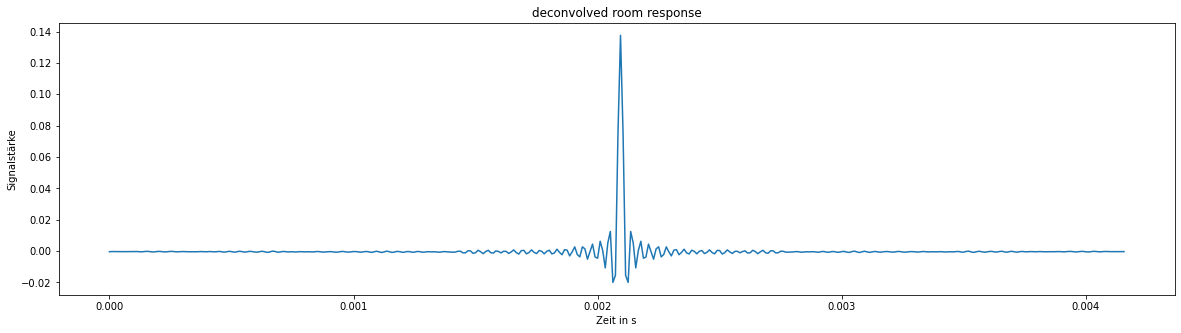

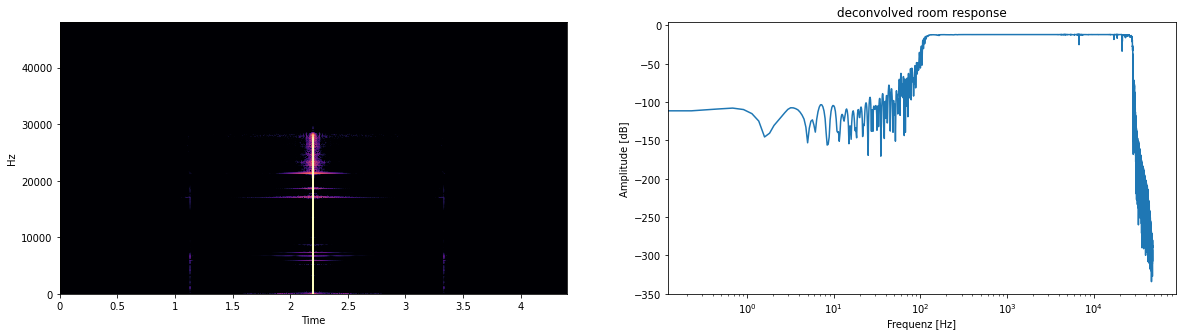

In [27]:

sg.plot_spec(rec,title="recorded spec")
sg.plot_signal(rec,title="rec")

room_response = fftconvolve( rec, logsweep.inverse(), mode='full')
#room_response=room_response[int(96000*1.52):int(96000*1.52)+5000]
#room_response=room_response[int(room_response.shape[0]/2)-5000:int(room_response.shape[0]/2)+5000]
#room_response=room_response[logsweep.inverse().shape[0]:logsweep.inverse().shape[0]*2+1]
start=np.argmax(room_response)
sg.plot_signal(room_response[start-int(96000*0.005):start+int(96000*0.1)],title="room respionse")
sg.plot_signal(np.absolute(room_response[start-int(96000*0.005):start+int(96000*0.1)]),title="room respionse")
sg.plot_signal(np.absolute(room_response[start+int(96000*0.0018):start+int(96000*0.1)]),title="room respionse")



# Derive inverted room response for active room correction.
Hi = fft(room_response)
lmbd = 1e-2
# Perform Weiner deconvolution.
inv_room_response = np.real(ifft(np.conj(Hi)/(Hi*np.conj(Hi) + lmbd**2)))
inv_room_response /= np.max(np.abs(inv_room_response))

deconvolved_ir = fftconvolve(room_response, inv_room_response)

sg.plot_signal(deconvolved_ir[int(deconvolved_ir.shape[0]/2)-200:int(deconvolved_ir.shape[0]/2)+200],title="deconvolved room response")
sg.plot_spec(deconvolved_ir,title="deconvolved room response")

#deconvolved_sweep = fftconvolve(rec, inv_room_response[::48000])
#sg.plot_spec(deconvolved_sweep,title="deconvolved sine")
#sg.plot_signal(deconvolved_sweep,title="deconvolved sine")